# 题目
给定一个字符串 s ，请你找出其中不含有重复字符的**最长子串**的长度。

示例 1:

输入: s = "abcabcbb"
输出: 3 
解释: 因为无重复字符的最长子串是 "abc"，所以其长度为 3。
示例 2:

输入: s = "bbbbb"
输出: 1
解释: 因为无重复字符的最长子串是 "b"，所以其长度为 1。
示例 3:

输入: s = "pwwkew"
输出: 3
解释: 因为无重复字符的最长子串是 "wke"，所以其长度为 3。
     请注意，你的答案必须是 子串 的长度，"pwke" 是一个子序列，不是子串。
 

提示：

0 <= s.length <= 5 * 104
s 由英文字母、数字、符号和空格组成

# 算法思想

<font color=red size=5> 核心：滑动窗口、双指针、哈希集合 </font>   
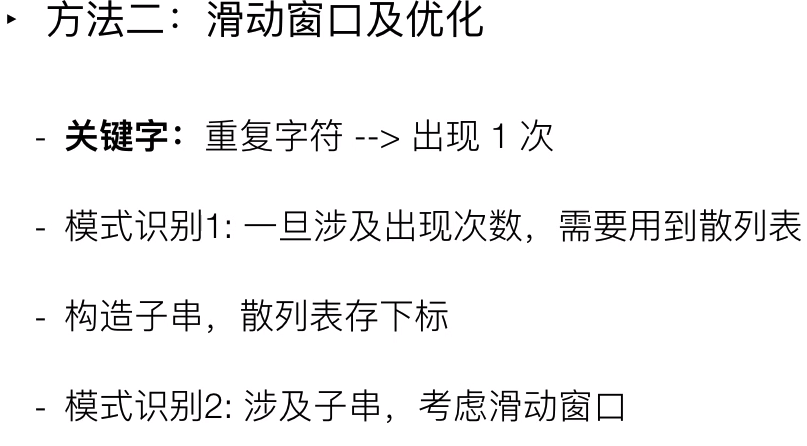
思路与算法：   
我们先用一个例子考虑如何在较优的时间复杂度内通过本题。

我们不妨以示例一中的字符串 \texttt{abcabcbb}abcabcbb 为例，找出从每一个字符开始的，不包含重复字符的最长子串，那么其中最长的那个字符串即为答案。对于示例一中的字符串，我们列举出这些结果，其中括号中表示选中的字符以及最长的字符串：

$以 \texttt{(a)bcabcbb}开始的最长字符串为 \texttt{(abc)abcbb}；$
$以 \texttt{a(b)cabcbb}开始的最长字符串为 \texttt{a(bca)bcbb}；$
$以 \texttt{ab(c)abcbb}开始的最长字符串为 \texttt{ab(cab)cbb}；$
$以 \texttt{abc(a)bcbb}开始的最长字符串为 \texttt{abc(abc)bb}；$
$以 \texttt{abca(b)cbb}开始的最长字符串为 \texttt{abca(bc)bb}；$
$以 \texttt{abcab(c)bb}开始的最长字符串为 \texttt{abcab(cb)b}；$
$以 \texttt{abcabc(b)b}开始的最长字符串为 \texttt{abcabc(b)b}；$
$以 \texttt{abcabcb(b)}开始的最长字符串为 \texttt{abcabcb(b)}。$

发现了什么？如果我们依次递增地枚举子串的起始位置，那么子串的结束位置也是递增的！这里的原因在于，假设我们选择字符串中的第 k 个字符作为起始位置，并且得到了不包含重复字符的最长子串的结束位置为 $r_k$。那么当我们选择第 k+1个字符作为起始位置时，首先从 k+1 到 $r_k$的字符显然是不重复的，并且由于少了原本的第 kk 个字符，我们可以尝试继续增大 $r_k$
 ，直到右侧出现了重复字符为止。

这样一来，我们就可以使用「滑动窗口」来解决这个问题了：

我们使用两个指针表示字符串中的某个子串（或窗口）的左右边界，其中左指针代表着上文中「枚举子串的起始位置」，而右指针即为上文中的 $r_k$；

在每一步的操作中，我们会将左指针向右移动一格，表示 我们开始枚举下一个字符作为起始位置，然后我们可以不断地向右移动右指针，但需要保证这两个指针对应的子串中没有重复的字符。在移动结束后，这个子串就对应着 以左指针开始的，不包含重复字符的最长子串。我们记录下这个子串的长度；

在枚举结束后，我们找到的最长的子串的长度即为答案。

判断重复字符

在上面的流程中，我们还需要使用一种数据结构来判断 是否有重复的字符，常用的数据结构为哈希集合（即 C++ 中的 std::unordered_set，Java 中的 HashSet，Python 中的 set, JavaScript 中的 Set）。在左指针向右移动的时候，我们从哈希集合中移除一个字符，在右指针向右移动的时候，我们往哈希集合中添加一个字符。

至此，我们就完美解决了本题。

# 代码实现

In [7]:
# leetcode提交
# 哈希Map 只需一次遍历, more efficiency
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        k, res, c_dict = -1, 0, {} # k左边界，i右边界
        for i, c in enumerate(s):
            if c in c_dict and c_dict[c] > k:  # 字符c在字典中,且上次出现的下标大于当前长度的起始下标(只有不同元素重复才更新)
                k = c_dict[c]
                c_dict[c] = i
            else:
                c_dict[c] = i
                res = max(res, i-k)
        return res

s = 'adaf'
a = Solution()
b = a.lengthOfLongestSubstring(s)
print(b)

3


In [1]:
# 官方解答
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        # 哈希集合，记录每个字符是否出现过
        occ = set()
        n = len(s)
        # 右指针，初始值为 -1，相当于我们在字符串的左边界的左侧，还没有开始移动
        rk, ans = -1, 0
        for i in range(n):
            if i != 0:
                # 左指针向右移动一格，移除一个字符
                occ.remove(s[i - 1])
            while rk + 1 < n and s[rk + 1] not in occ:
                # 不断地移动右指针
                occ.add(s[rk + 1])
                rk += 1
            # 第 i 到 rk 个字符是一个极长的无重复字符子串
            ans = max(ans, rk - i + 1)
        return ans